# SWMAL Exercise


## Gradient Descent Methods and Training

Finding the optimal solution in one-step, via 

$$
    \newcommand\rem[1]{}
    \rem{ITMAL: CEF def and LaTeX commands, remember: no newlines in defs}
    \newcommand\eq[2]{#1 &=& #2\\}
    \newcommand\ar[2]{\begin{array}{#1}#2\end{array}}
    \newcommand\ac[2]{\left[\ar{#1}{#2}\right]}
    \newcommand\st[1]{_{\mbox{\scriptsize #1}}}
    \newcommand\norm[1]{{\cal L}_{#1}}
    \newcommand\obs[2]{#1_{\mbox{\scriptsize obs}}^{\left(#2\right)}}
    \newcommand\diff[1]{\mbox{d}#1}
    \newcommand\pown[1]{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\mbox{\scriptsize test}}}
    \def\powtrain{\pown{\mbox{\scriptsize train}}}
    \def\bX{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bw{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
    \newcommand\pfrac[2]{\frac{\partial~#1}{\partial~#2}}
    \newcommand\dfrac[2]{\frac{\mbox{d}~#1}{\mbox{d}#2}}
\bw^* ~=~ \left( \bX^\top \bX \right)^{-1} \bX^\top \by
$$

has its downsides: the scaling problem of the matrix inverse. Now, let us look at a numerical solution to the problem of finding the value of $\bw$  (aka $\btheta$) that minimizes the objective function $J$.

Again, ideally we just want to find places, where the (multi-dimensionally) gradient of $J$ is zero (here using a constant factor $\frac{2}{m}$)

$$
\ar{rl}{
  \nabla_\bw J(\bw) &= \frac{2}{m} \bX^\top \left( \bX \bw - \by \right)\\
}
$$

and numerically we calculate $\nabla_{\bw} J$ for a point in $\bw$-space, and then move along in the opposite direction of this gradient, taking a step of size $\eta$

$$ 
  \bw^{(step~N+1)} = \bw^{(step~N)} - \eta \nabla_{\bw} J(\bw)
$$

That's it, pretty simple, right (apart from numerical stability, problem with convergence and regularization, that we will discuss later).

So, we begin with some initial $\bw$, and iterate via the equation above, towards places, where $J$ is smaller, and this can be illustrated as

<img src="https://itundervisning.ase.au.dk/SWMAL/L05/Figs/minimization_gd.png" alt="WARNING: could not get image from server." style="height:240px">


If we hit the/a global minimum or just a local minimum (or in extremely rare cases a local saddle point) is another question when not using a simple linear regression model: for non-linear models we will in general not see a nice convex $J$-$\bw$ surface, as in the figure above.

### Qa The Gradient Descent Method (GD)

Explain the gradient descent algorithm using the equations [HOML] p.121-122. and relate it to the code snippet 

```python
X_b, y = GenerateData()

eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
``` 
in the python code below. 

As usual, avoid going top much into details of the code that does the plotting.

What role does `eta` play, and what happens if you increase/decrease it (explain the three plots)?

stochastic gradient descent theta=[4.18413764 2.89379736]


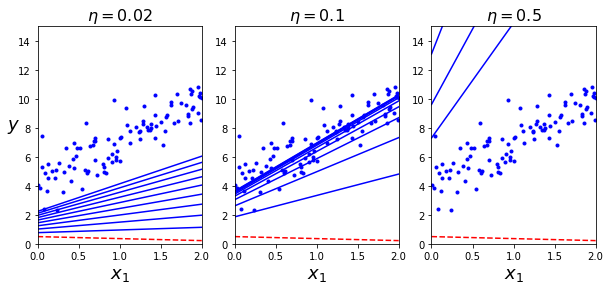

OK


In [1]:
# TODO: Qa...examine the method (without the plotting)

# NOTE: modified code from [GITHOML], 05/Extra/_training_linear_models.ipynb

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def GenerateData():
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)
    X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
    return X, X_b, y

X, X_b, y = GenerateData()

eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(f'stochastic gradient descent theta={theta.ravel()}')

##########################################################
# rest of the code is just for plotting, needs no review

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta_path_bgd = []
theta = np.random.randn(2,1)  # random initialization

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

print('OK')

### Qb The Stochastic Gradient Descent Method (SGD)

Now, introducing the _stochastic_ variant of gradient descent, explain the stochastic nature of the SGD, and comment on the difference to the _normal_ gradient descent method (GD) we just saw.

Also explain the role of the calls to `np.random.randint()` in the code, 

HINT: In detail, the important differences are, that the main loop for SGC is 
```python
for epoch in range(n_epochs):
    for i in range(m):
        .
        .
        .
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = ...
        theta = ...
```
where it for the GD method was just
```python
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = ..
```

NOTE: the call `np.random.seed(42)` resets the random generator so that it produces the same random-sequence when re-running the code.

stochastic gradient descent theta=[4.15455636 2.90398734]
Scikit-learn SGDRegressor "thetas": sgd_reg.intercept_=[4.19545345], sgd_reg.coef_=[2.88300654]


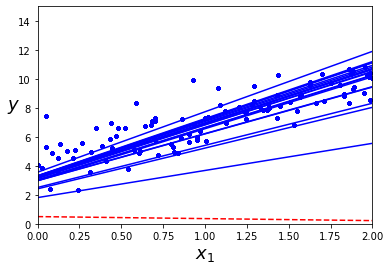

OK


In [2]:
# TODO: Qb...run this code

# NOTE: code from [GITHOML], 05/Extra/_training_linear_models.ipynb

theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta) 
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)        
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

        plt.plot(X, y, "b.")      
        

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
print(f'stochastic gradient descent theta={theta.ravel()}')
print(f'Scikit-learn SGDRegressor "thetas": sgd_reg.intercept_={sgd_reg.intercept_}, sgd_reg.coef_={sgd_reg.coef_}')
        

##########################################################
# rest of the code is just for plotting, needs no review 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              

plt.show()        

print('OK')

### Qc Adaptive learning rate for $\eta$  

There is also an adaptive learning rate method in the demo code for the SGD. 

Explain the effects of the `learning_schedule()` functions.

You can set the learning rate parameter (also known as a hyperparameter) in may ML algorithms, say for SGD regression, to a method of your choice 

```python
SGDRegressor(max_iter=1,
             eta0=0.0005,
             learning_rate="constant", # or 'adaptive' etc.
             random_state=42)
```

but as usual, there is a bewildering array of possibilities...we will tackle this problem later when searching for the optimal hyperparameters.

NOTE: the `learning_schedule()` method could also have been used in the normal SG algorithm; is not directly part of the stochastic method, but a concept in itself.

In [3]:
# TODO: Qc...in text

### Qd Mini-batch Gradient Descent Method 

Finally explain what a __mini-batch__ SG method is, and how it differs from the two others.

Again, take a peek into the demo code below, to extract the algorithm details...and explain the __main differences__, compared with the GD and SGD.

In [8]:
# TODO: Qd...run this code

# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

print(f'mini-batch theta={theta.ravel()}')
print('OK')


mini-batch theta=[4.120013   2.78416778]
OK


### Qe Choosing a Gradient Descent Method

Explain the $Î¸_0âˆ’Î¸_1$ plot below, and make a comment on when to use GD/SGD/mini-batch gradient descent (pros and cons for the different methods).

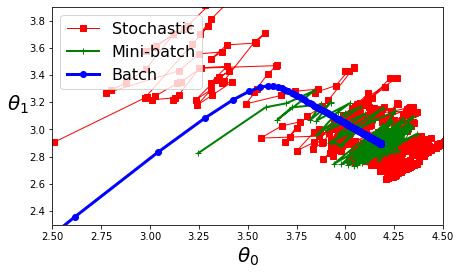

OK


In [5]:
# TODO: Qd...run this code

# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()
print('OK')

### [OPTIONAL]  Qf Extend the MyRegressor 

NOTE: this excercise only possible if `linear_regression_2.ipynb` has been solve.

Can you extend the `MyRegressor` class from the previous `linear_regression_2.ipynb` notebook, adding a numerical train method? Choose one of the gradient descent methods above...perhaps starting with a plain SG method.

You could add a parameter for the class, indicating it what mode it should be operating: analytical closed-form or numerical, like

```python  
class MyRegressor(BaseEstimator):
    def __init__(self, numerical = False):
        self.__w = None
        self.__numerical_mode = numerical
    .
    .
    .
```

In [6]:
# TODO: Qf...[OPTIONAL]

REVISIONS||
---------||
2018-02-14| CEF, initial.
2018-02-14| CEF, added optional exe.
2018-02-20| CEF, major update.
2018-02-20| CEF, fixed revision table malformatting.
2018-02-25| CEF, removed =0 in expression.
2018-02-25| CEF, minor text updates and made Qc optional.
2018-02-25| CEF, minor source code cleanups.
2021-09-18| CEF, update to ITMAL E21.
2021-10-02| CEF, corrected link to extra material and page numbers for HOML v2 (114/115=>121/122).
2022-01-25| CEF, update to SWMAL F22.
